In [1]:
# Preparing the data 

import pandas as pd
import glob

path = 'C:/TUK/Sem 3/Applied AI/Meeting Engagement Task/Data/'

# Getting list of all csv files that contain the dataset
all_files = glob.glob(path + "/*data.csv")

data_li = []
labels_li = []

# Read file contents into a Pandas DataFrame
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    
    # Cleaning the data
    df.dropna(inplace=True)
    
    # Removing rows with label = 3
    df = df.drop(df[df['label'] == 3].index)
    
    labels = df['label']
    
    # Read the data from all other columns (except label) in the DataFrame
    data = df.drop('label', axis=1)
    
    data_li.append(data)
    labels_li.append(labels)
    

# Concatenate the data and labels
feature_data = pd.concat(data_li, axis=0, ignore_index=True)
labels = pd.concat(labels_li, axis=0, ignore_index=True)

print(feature_data.shape)
print(labels.shape)


(153167, 713)
(153167,)


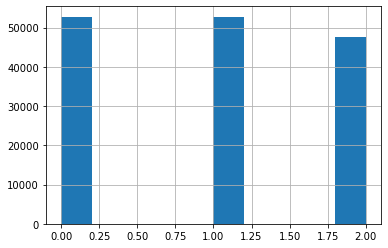

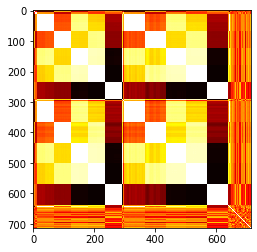

In [2]:
# Data Exploration

import matplotlib.pyplot as plt

# Plot the distribution of the labels
labels.hist()
plt.show()

# Plot the correlation matrix of the features to get insight on how data is related
corr_matrix = feature_data.corr()
plt.imshow(corr_matrix, cmap='hot', interpolation='nearest')
plt.show()

In [2]:
# Split the data into train, test and validation sets

from sklearn.model_selection import train_test_split

X_trainval, X_test, y_trainval, y_test = train_test_split(feature_data, labels, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.15, random_state=42)
print('done')

done


In [4]:
# Training different classifiers on the data and evaluating metrics for each

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train and evaluate multiple classifiers
classifiers = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "Logistic Regression": LogisticRegression()
}

for name, classifier in classifiers.items():
    
    # Train the classifier on the train set
    classifier.fit(X_train, y_train)
    
    # Predict labels for validation set
    y_val_pred = classifier.predict(X_val)
    accuracy = accuracy_score(y_val, y_val_pred)
    print(f"{name} Validation accuracy:", accuracy)
    print(f"{name} Validation Set Classification Report:")
    print(classification_report(y_val, y_val_pred))
    print(f"{name} Validation Set Confusion Matrix:")
    print(confusion_matrix(y_val, y_val_pred))
    
    # Predict labels for test set
    y_test_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_test_pred)
    print(f"{name}Test accuracy:", accuracy)
    print(f"{name} Test Set Classification Report:")
    print(classification_report(y_test, y_test_pred))
    print(f"{name} Test Set Confusion Matrix:")
    print(confusion_matrix(y_test, y_test_pred))

Decision Tree Validation accuracy: 0.9385017153976138
Decision Tree Validation Set Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      6796
           1       0.91      0.92      0.91      6653
           2       0.99      0.98      0.99      6080

    accuracy                           0.94     19529
   macro avg       0.94      0.94      0.94     19529
weighted avg       0.94      0.94      0.94     19529

Decision Tree Validation Set Confusion Matrix:
[[6252  520   24]
 [ 511 6097   45]
 [  41   60 5979]]
Decision TreeTest accuracy: 0.9375870473537604
Decision Tree Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      7961
           1       0.91      0.92      0.91      7904
           2       0.99      0.99      0.99      7111

    accuracy                           0.94     22976
   macro avg       0.94      0.94      0.94   

C:\Users\polpo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Validation accuracy: 0.8074146141635516
Logistic Regression Validation Set Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.70      0.80      6796
           1       0.72      0.90      0.80      6653
           2       0.83      0.82      0.82      6080

    accuracy                           0.81     19529
   macro avg       0.82      0.81      0.81     19529
weighted avg       0.82      0.81      0.81     19529

Logistic Regression Validation Set Confusion Matrix:
[[4771 1485  540]
 [ 131 6019  503]
 [ 252  850 4978]]
Logistic RegressionTest accuracy: 0.8095403899721448
Logistic Regression Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.71      0.80      7961
           1       0.72      0.91      0.80      7904
           2       0.83      0.82      0.83      7111

    accuracy                           0.81     22976
   macro avg    

In [3]:
# Using a deep neural network for the problem statement 
# DNN has three hidden layers and the softmax activation function in the output layer

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import tensorflow as tf
from tensorflow import keras

# Convert data to numpy array
X = feature_data.values
y = labels.values

# Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets (same as above)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

print('Starting training')

model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_dim=X_train.shape[1]),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=30, batch_size=32, verbose=1)

# Evaluate the model
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
print(f"Accuracy score: {accuracy_score(y_test, y_pred)}")
print(f"Classification report:\n{classification_report(y_test, y_pred)}")
print(f"Confusion matrix:\n{confusion_matrix(y_test, y_pred)}")

print('Evaluation completed')


Starting training
Epoch 1/30
4069/4069 [==============================] - 16s 3ms/step - loss: 0.1993 - accuracy: 0.9153
Epoch 2/30
4069/4069 [==============================] - 13s 3ms/step - loss: 0.1469 - accuracy: 0.9358
Epoch 3/30
4069/4069 [==============================] - 13s 3ms/step - loss: 0.1323 - accuracy: 0.9413
Epoch 4/30
4069/4069 [==============================] - 13s 3ms/step - loss: 0.1234 - accuracy: 0.9444
Epoch 5/30
4069/4069 [==============================] - 13s 3ms/step - loss: 0.1173 - accuracy: 0.9463
Epoch 6/30
4069/4069 [==============================] - 13s 3ms/step - loss: 0.1144 - accuracy: 0.9473
Epoch 7/30
4069/4069 [==============================] - 13s 3ms/step - loss: 0.1121 - accuracy: 0.9486
Epoch 8/30
4069/4069 [==============================] - 15s 4ms/step - loss: 0.1083 - accuracy: 0.9491
Epoch 9/30
4069/4069 [==============================] - 14s 3ms/step - loss: 0.1066 - accuracy: 0.9500
Epoch 10/30
4069/4069 [==============================] 

In [ ]:
OBSERVATIONS ON RESULTS: 

    1. As seen above, the evaluation metrics show that the validation set and test set accuracy is almost similar, ie, 
    above 93% for Decision Trees (DT) and 95% for Random Forest (RF) and Deep Neural Network (DNN). 
    
    2. We have good precision and recall for each class labels as well. This is the case for a basic version of these classifiers.
    
    3. The computation time of DT and RF was quite low, trained within a few minutes. It took a few minutes more for DNN.
    It took a long duration of time to train the same data on a basic SVM and LR. Also a basic LR reached the limit for the total
    number of iterations.
    
    4. Test accuracy is quite high. Hence good amount of generalization for DT and RF. Evident from confusion matrix as well.
    
    5. As for DNN the accuracy passes 95% within the first 10 epochs. 
    
    
CONCLUSIONS:
    
    1. The data is neither underfitting nor overfitting (can be attributed to high test accuracy) in RF, DT and DNN.
    
    2. Overall, RF, DT and DNNs are a good choice for such multi-class classification problems because they handle high-dimensional data. 
    Clearly our dataset includes facial features like gaze angle, eye position in different data frames.
    
    3. Correlation matrix suggests that the most of the data linearity is intermediate. As compared to SVM and LR, RF and DT can handle
    non linearities in data quite well.
    
    4. DNNs can handle nonlinearities as well. They learn the relationships between input features and output classes in every epoch,
    which is evident from the rise in accuracy and drop in loss in each epoch.
    
    5. These 3 are more robust to outliers than the others.
    
    6. Type of data also matters. As dataset contains numeric and continous data, RF and DT are a better fit than others.
    
    7. We could also use classifiers like adaboost or bagging that can increase randomness and probably generalize better. 
    However, the kind of dataset and evaluation metrics as used in the above implementation would be required to verify this.
    
    
PROBLEMS IDENTIFIED:
    
    1. Data preparation was a troublesome yet necessary step. Initially, I was operating on the extracted data without cleaning it.
    This effected my results. Hence, preprocessing became vital.
    
    2. Secondly, after observing the data properly, I realized that there were many undefined class labels (label 3). 
    Hence, I plotted the class distribution histogram to verify this. These rows needed to be dropped for correct evaluation of the
    problem statement.
    
    3. As the data was so huge, it was difficult to identify what classifier to pick in the first go.
    This is why, I tried out multiple approaches and reached the mentioned conclusions.
    
    4. Computation time for the weak performing classifiers was very large.
    
    5. Choosing the hyperparameters for DNN also required some effort and reading.